In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [6]:
sc.settings.verbosity = 3
# sc.settings.set_figure_params(dpi=100)
sns.set(color_codes=True)

In [7]:
# Configure data path
data_path = 'dataset/'

### Check new dataset

In [4]:
%%bash
ls -al | grep gz

-rw-rw-r-- 1 yinuo yinuo 20519629 Nov 22 00:39 GSE84465_GBM_All_data.csv.gz


In [5]:
gbm_counts = pd.read_csv('GSE84465_GBM_All_data.csv.gz', compression='gzip', sep=' ', nrows=5)
gbm_counts.head()

,1001000173.G8,1001000173.D4,1001000173.B4,1001000173.A2,1001000173.E2,1001000173.F6,1001000173.B12,1001000173.D6,1001000173.H1,1001000173.E4,...,1001000271.C2,1001000271.D1,1001000271.B1,1001000271.A3,1001000271.E1,1001000271.F1,1001000271.D4,1001000271.C1,1001000271.H7,1001000271.H2
1/2-SBSRNA4,1,0,0,0,0,0,0,64,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG,0,0,0,0,0,0,53,0,0,229,...,7,2,0,0,0,0,61,0,0,0
A1BG-AS1,0,0,0,1,0,0,24,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###  Load dataset

In [168]:
%%bash 
# ls -al dataset/

In [6]:
raw_counts = pd.read_csv(data_path + 'GSE89567_IDH_A_processed_data.txt.gz', compression='gzip', sep='\t', index_col=0)
raw_counts.index = [gene.strip("'") for gene in raw_counts.index]
raw_counts.head()

,MGH42_P7_A01,MGH42_P7_A02,MGH42_P7_A03,MGH42_P7_A04,MGH42_P7_A05,MGH42_P7_A07,MGH42_P7_A09,MGH42_P7_A11,MGH42_P7_A12,MGH42_P7_B02,...,MGH107neg_P2_E06,MGH107pos_P2_B03,MGH107neg_P1_F03,MGH107neg_P1_G06,MGH107neg_P2_H03,MGH107neg_P2_C05,MGH107pos_P2_D07,MGH107neg_P1_E01,MGH107pos_P2_G09,MGH107neg_P1_D06
A1BG,1.1928,0.000000,0.00000,0.0000,0.0000,0.66903,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,2.4772,0.0000,0.0
A1BG-AS1,0.0000,0.000000,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.83996,0.0000,0.0000,0.0000,0.0
A1CF,0.0000,0.094912,0.00000,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0
A2M,7.0439,7.609500,0.77062,7.6146,0.0000,0.00000,0.27501,8.1624,6.5655,6.9658,...,0.0,8.6046,0.0,0.0,0.0,0.00000,9.5281,0.0000,6.8999,0.0
A2M-AS1,0.0000,0.000000,0.00000,0.0000,2.0339,2.39420,0.00000,0.0000,0.0000,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.00000,0.0000,0.0000,0.0000,0.0


In [10]:
# genes_set = set(raw_counts.index)

### Library size plot

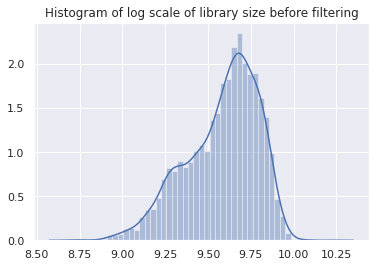

In [7]:
libsize = raw_counts.sum(0)
sns.distplot(np.log1p(libsize))
plt.title('Histogram of log scale of library size before filtering')
plt.show()

### Gexp plot

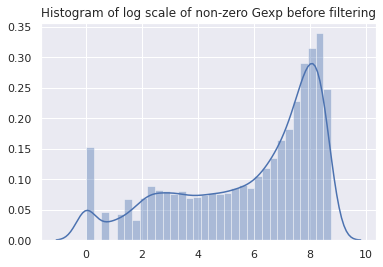

In [8]:
n_cells_per_gene = raw_counts.apply(lambda x: (x > 0).sum(), axis=1)
sns.distplot(np.log1p(n_cells_per_gene))
plt.title('Histogram of log scale of non-zero Gexp before filtering')
plt.show()

### Filter low-expression cells & genes

In [9]:
raw_counts = raw_counts.transpose()
raw_counts.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,AA06,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
MGH42_P7_A01,1.1928,0.0,0.000000,7.04390,0.0000,0.00000,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.090853,0.23879,0.00000,0.27143,2.7058,0.7137,0.0000
MGH42_P7_A02,0.0000,0.0,0.094912,7.60950,0.0000,0.00000,0.0,0.0,0.0,0.0,...,0.26183,0.00000,0.0,0.000000,0.37518,0.37072,0.44467,2.1077,1.1434,0.0000
MGH42_P7_A03,0.0000,0.0,0.000000,0.77062,0.0000,0.19535,0.0,0.0,0.0,0.0,...,0.42975,3.14010,0.0,2.068300,0.76043,0.47508,3.13260,0.0000,0.0000,3.3404
MGH42_P7_A04,0.0000,0.0,0.000000,7.61460,0.0000,0.32077,0.0,0.0,0.0,0.0,...,0.00000,0.58688,0.0,0.000000,0.78157,0.15056,1.48650,3.8459,0.0000,0.0000
MGH42_P7_A05,0.0000,0.0,0.000000,0.00000,2.0339,0.20664,0.0,0.0,0.0,0.0,...,0.00000,0.00000,0.0,0.000000,2.60240,0.47508,4.03830,3.8272,1.5514,4.8840


In [94]:
threshold_cells = np.int(10**3.5)
threshold_genes = 10**2

mask_cells = raw_counts.apply(lambda x: (x > 0).sum() > threshold_cells, axis=1)
mask_genes = raw_counts.apply(lambda x: (x > 0).sum() > threshold_genes, axis=0)

filtered_counts = raw_counts.loc[mask_cells, mask_genes]
print('Number of cells filtered out:', raw_counts.shape[0] - filtered_counts.shape[0])
print('Number of genes filtered out:', raw_counts.shape[1] - filtered_counts.shape[1])
print('Filtered matrix shape:', filtered_counts.shape)

filtered_counts.index.name = 'Cell_ID'
filtered_counts.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,AAAS,AACS,AACSP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Cell_ID,,,,,,,,,,,,,,,,,,,,,
MGH42_P7_A01,1.1928,0.0,0.000000,7.04390,0.0000,0.00000,0.0,0.0000,0.15316,0.0,...,0.00000,0.00000,0.0,0.090853,0.23879,0.00000,0.27143,2.7058,0.7137,0.0000
MGH42_P7_A02,0.0000,0.0,0.094912,7.60950,0.0000,0.00000,0.0,0.0000,0.96421,0.0,...,0.26183,0.00000,0.0,0.000000,0.37518,0.37072,0.44467,2.1077,1.1434,0.0000
MGH42_P7_A03,0.0000,0.0,0.000000,0.77062,0.0000,0.19535,0.0,2.4662,2.99400,0.0,...,0.42975,3.14010,0.0,2.068300,0.76043,0.47508,3.13260,0.0000,0.0000,3.3404
MGH42_P7_A04,0.0000,0.0,0.000000,7.61460,0.0000,0.32077,0.0,0.0000,0.00000,0.0,...,0.00000,0.58688,0.0,0.000000,0.78157,0.15056,1.48650,3.8459,0.0000,0.0000
MGH42_P7_A05,0.0000,0.0,0.000000,0.00000,2.0339,0.20664,0.0,1.9800,5.13340,0.0,...,0.00000,0.00000,0.0,0.000000,2.60240,0.47508,4.03830,3.8272,1.5514,4.8840


### Perform dimensionality reduction & clustering with scanpy

computing PCA
    with n_comps=50
    finished (0:00:04)


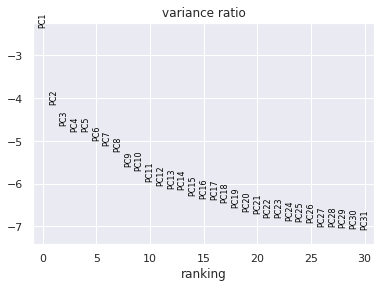

In [37]:
adata = sc.AnnData(filtered_counts)

sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


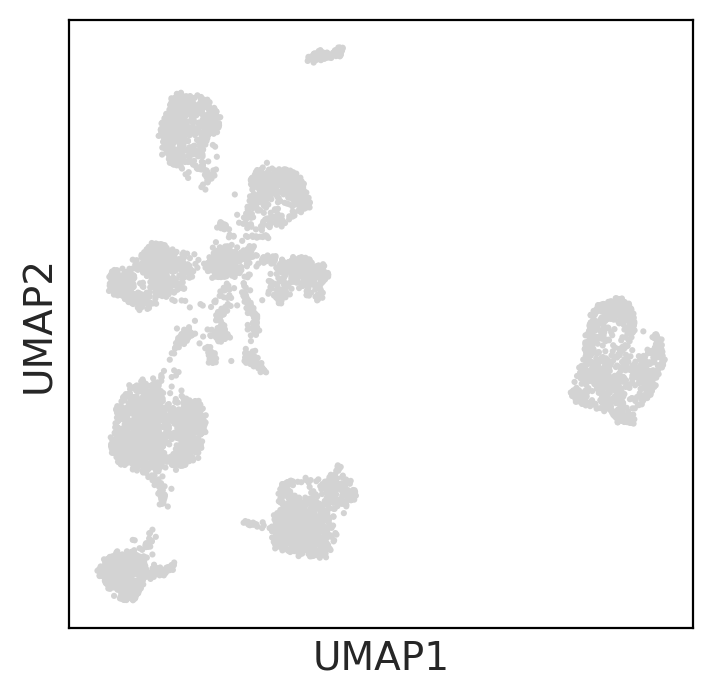

In [39]:
# Choose the top 30 PCs, compute neighbor graphs & visualize UMAP manifold

sc.settings.set_figure_params(dpi=100)

sc.pp.neighbors(adata, n_neighbors=50, n_pcs=30)
sc.tl.umap(adata)
sc.pl.umap(adata)

### Clustering via Leiden method & assign cell types based on marker genes

In [177]:
sc.tl.leiden(adata, resolution=0.5)
adata.obs

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


,leiden
Cell_ID,
MGH42_P7_A01,10
MGH42_P7_A02,10
MGH42_P7_A03,5
MGH42_P7_A04,10
MGH42_P7_A05,5
...,...
MGH107neg_P2_C05,11
MGH107pos_P2_D07,2
MGH107neg_P1_E01,11


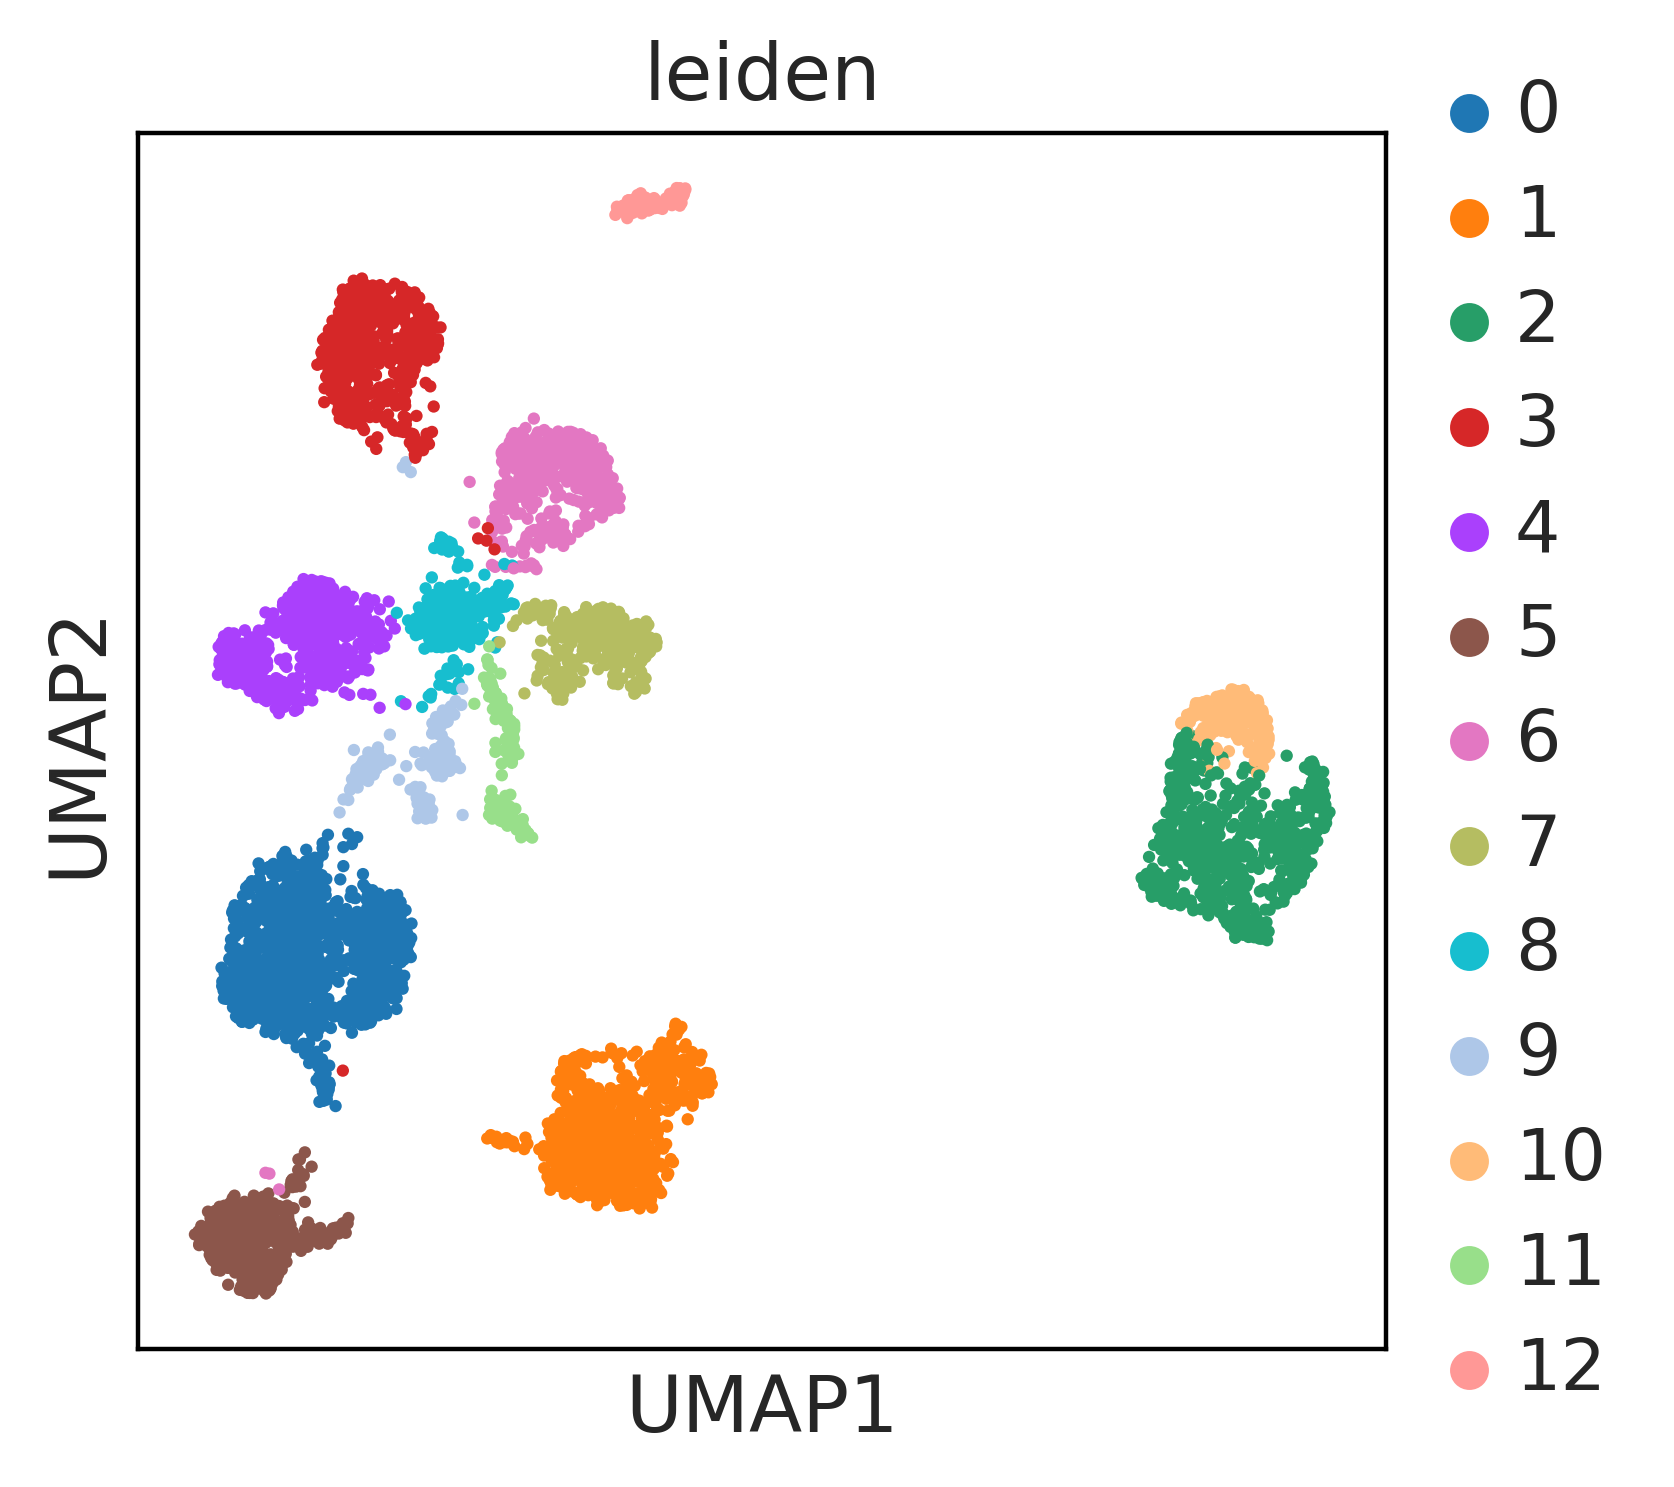

In [178]:
# Visualize UMAP again with cluster assignment
sc.pl.umap(adata, color='leiden')

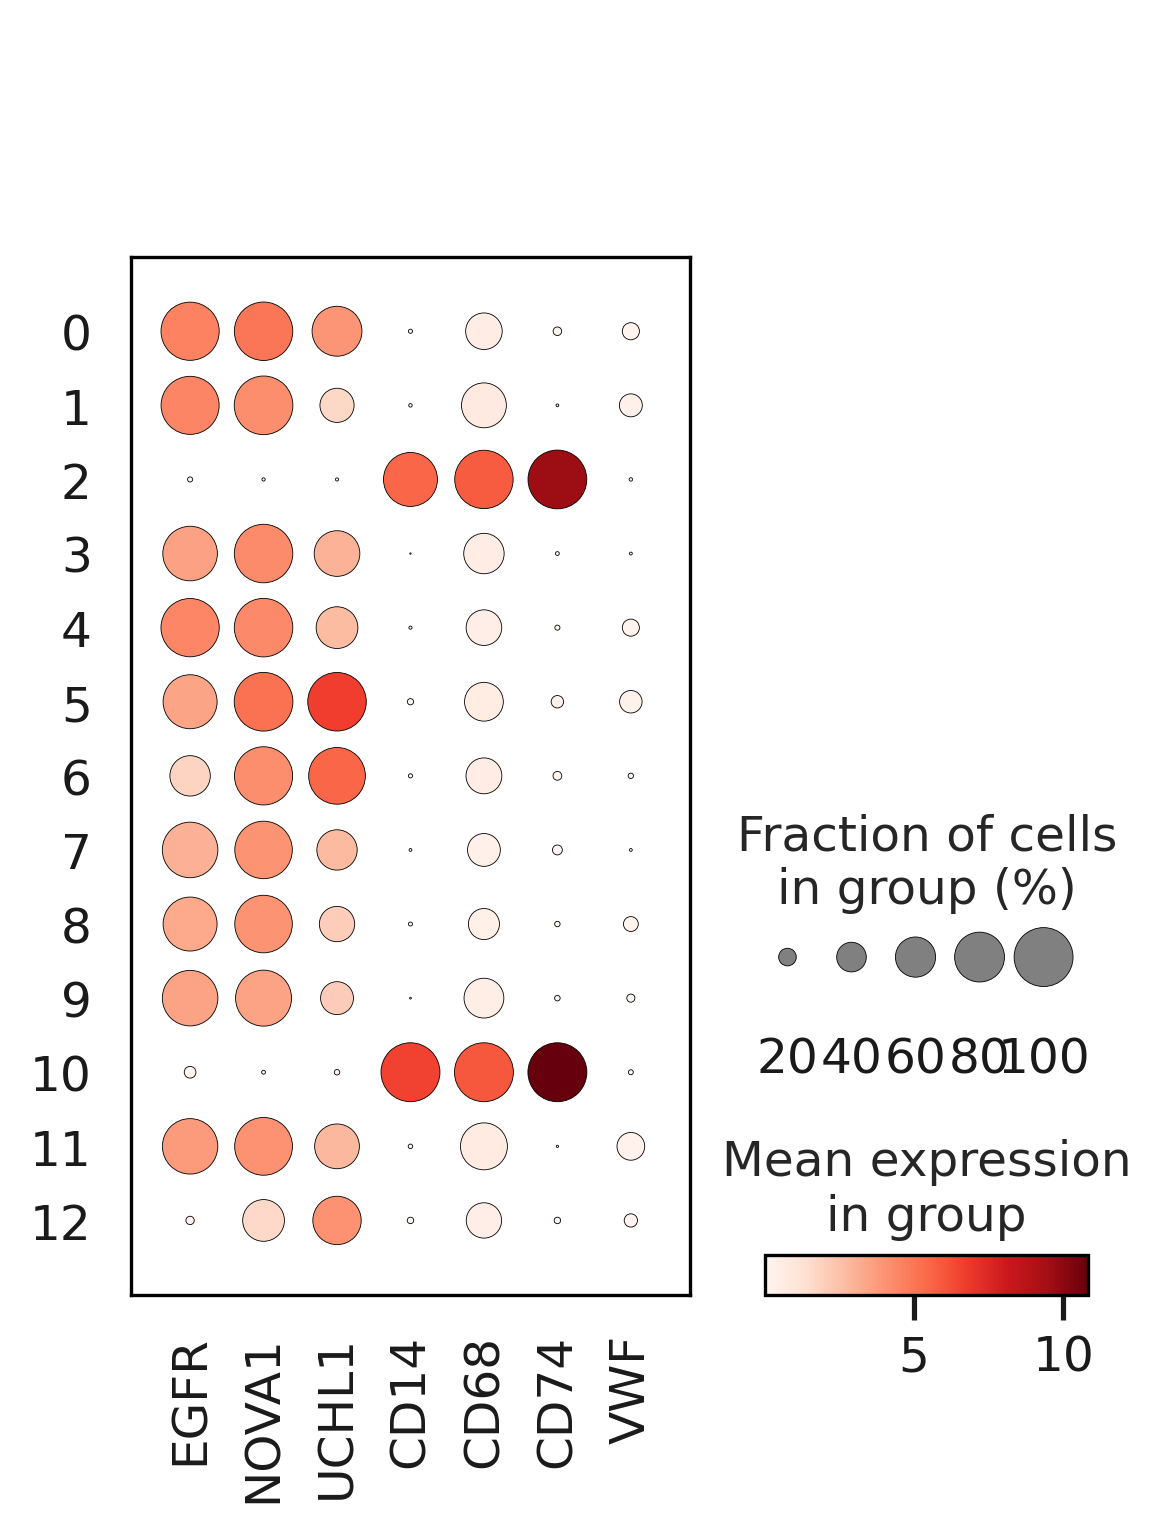

In [179]:
# Assign cell types of each cluster (Tumor or Macrophages) with marker genes
sc.settings.set_figure_params(dpi=150)
marker_genes = [
    'EGFR',
    'NOVA1', # tumor cell markers
    'UCHL1', 
    'CD14',  # macrophage markers
    'CD68',
    'CD74',  # endothelial marker
    'VWF'
]

sc.pl.dotplot(adata, marker_genes, groupby='leiden')

From the dotplot above, we can interpretate that cluster 2 & 10 are macrophages, whereas other cells are brain tumor cells

In [180]:
# Rename clusters (Tumor1, Tumor2, ...; Macrophage1, Macrophage2, ...)
tumor_labels = np.arange(1, 12)
macro_labels = np.arange(1, 3)
tumor_clusters = ['Tumor '+ str(label) for label in tumor_labels]
macro_clusters = ['Macrophage ' + str(label) for label in macro_labels]

orders = macro_clusters.copy()
orders.extend(tumor_clusters.copy())

cluster_names = []
for i in np.unique(adata.obs['leiden'].astype(int).to_numpy()):
    if i == 2 or i == 10:
        cluster_names.append(macro_clusters.pop(0))
    else:
        cluster_names.append(tumor_clusters.pop(0))
        
adata.rename_categories('leiden', cluster_names)

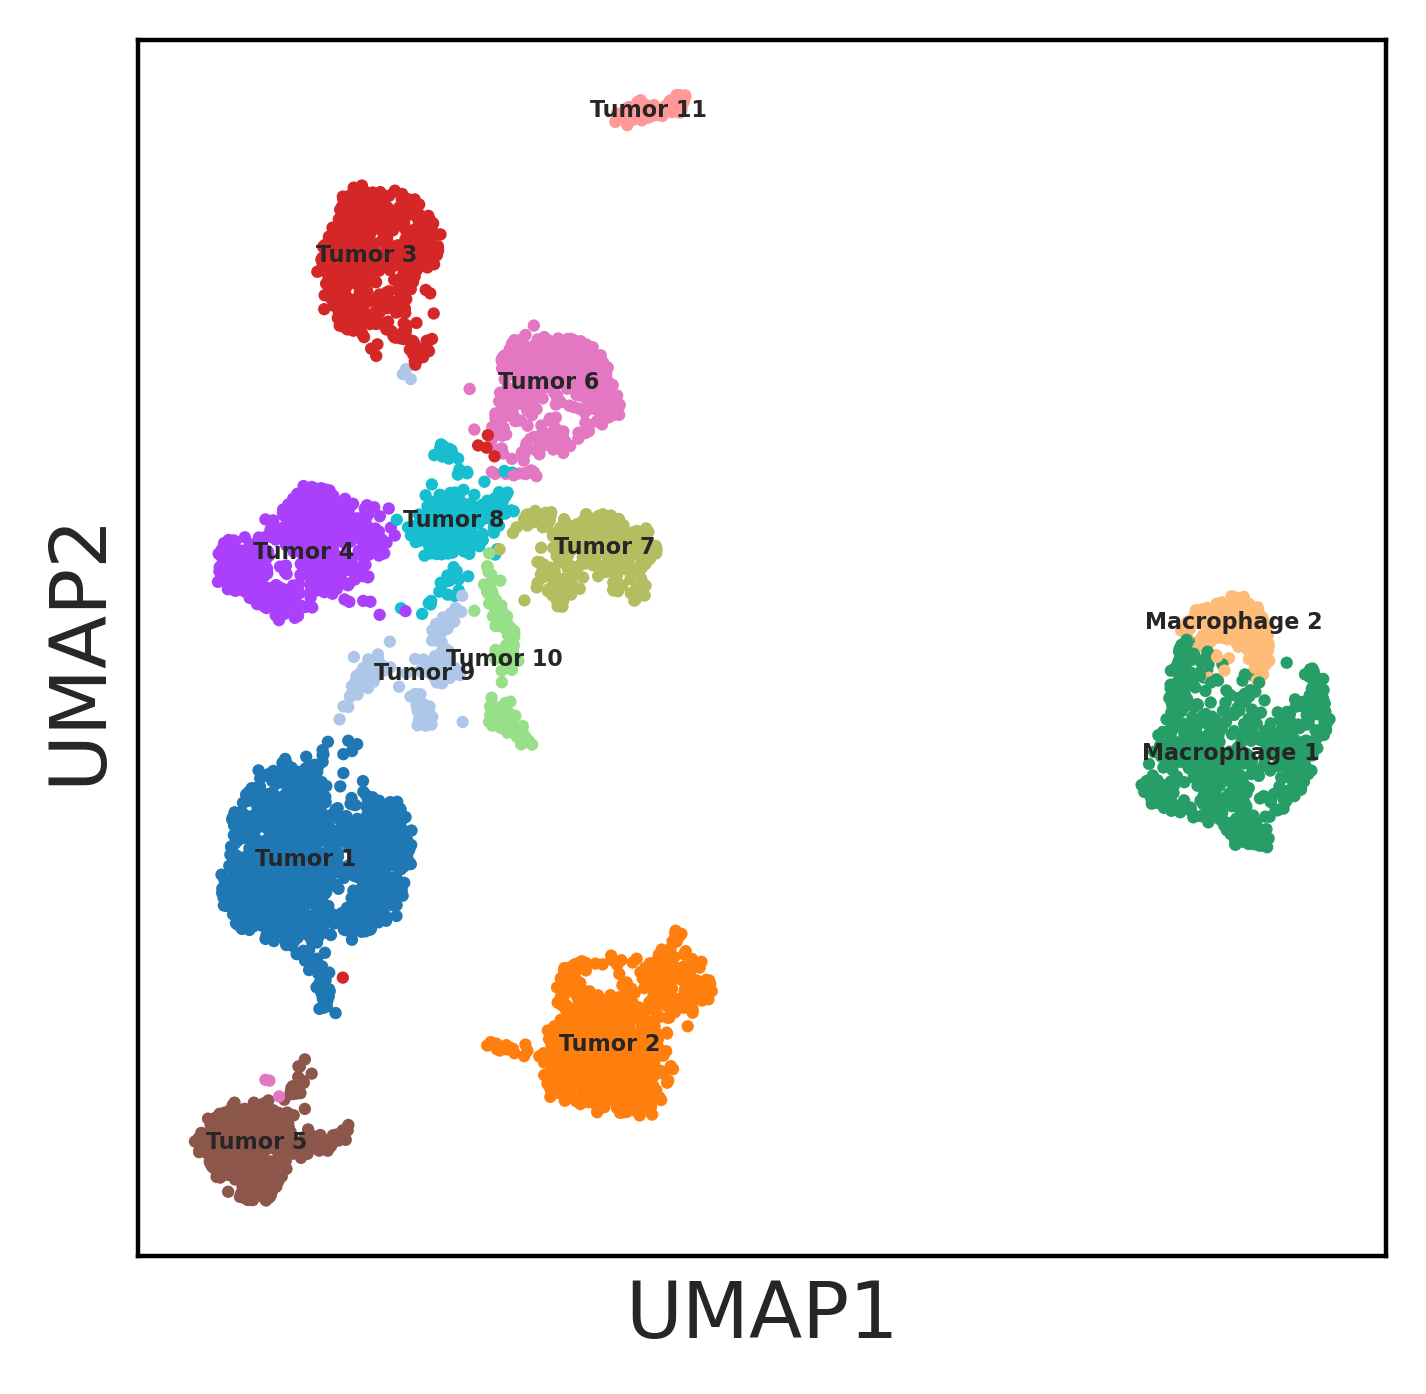

In [182]:
sc.settings.set_figure_params(dpi=200)
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', legend_fontsize=4)

In [183]:
# Save annotation (clustering results) to file
annotations = adata.obs
annotations.index.name = 'Cell_ID'
annotations.to_csv(data_path + 'cluster_annotation.csv')

### Get sets of "expressed genes"
From the suggestion from NicheNet Vignette, define "expressed genes" as genes with at least 10% non-zero counts: <br>
>  For single-cell data generated by the 10x platform in our lab, we consider genes to be expressed in a cell type when they have non-zero values in at least 10% of the cells from that cell type.

We obtain 4 different sets of expressed genes, one for each cell type respectively. <br>
E.g. there are 701 cells in cluster <i>Macrophage1</i>, so we filtered out all genes having at least 71 non-zero expression counts (raw UMI counts) in this cluster as the "expressed genes in <i>Macrophage1</i>

In [185]:
# double check that Cell_ID are consistent between annotations & filtered matrix count
assert np.array_equal(filtered_counts.index.to_numpy(), annotations.index.to_numpy())

filtered_counts['Cluster_ID'] = annotations['leiden']
filtered_counts.set_index('Cluster_ID', append=True, inplace=True)
filtered_counts.head()

,,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,AAAS,AACS,AACSP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Cell_ID,Cluster_ID,,,,,,,,,,,,,,,,,,,,,
MGH42_P7_A01,Macrophage 2,1.1928,0.0,0.000000,7.04390,0.0000,0.00000,0.0,0.0000,0.15316,0.0,...,0.00000,0.00000,0.0,0.090853,0.23879,0.00000,0.27143,2.7058,0.7137,0.0000
MGH42_P7_A02,Macrophage 2,0.0000,0.0,0.094912,7.60950,0.0000,0.00000,0.0,0.0000,0.96421,0.0,...,0.26183,0.00000,0.0,0.000000,0.37518,0.37072,0.44467,2.1077,1.1434,0.0000
MGH42_P7_A03,Tumor 5,0.0000,0.0,0.000000,0.77062,0.0000,0.19535,0.0,2.4662,2.99400,0.0,...,0.42975,3.14010,0.0,2.068300,0.76043,0.47508,3.13260,0.0000,0.0000,3.3404
MGH42_P7_A04,Macrophage 2,0.0000,0.0,0.000000,7.61460,0.0000,0.32077,0.0,0.0000,0.00000,0.0,...,0.00000,0.58688,0.0,0.000000,0.78157,0.15056,1.48650,3.8459,0.0000,0.0000
MGH42_P7_A05,Tumor 5,0.0000,0.0,0.000000,0.00000,2.0339,0.20664,0.0,1.9800,5.13340,0.0,...,0.00000,0.00000,0.0,0.000000,2.60240,0.47508,4.03830,3.8272,1.5514,4.8840


In [186]:
# Print cell counts of each cluster
filtered_counts.groupby('Cluster_ID').count()['A1BG']

Cluster_ID
Tumor 1         1205
Tumor 2          830
Macrophage 1     759
Tumor 3          617
Tumor 4          548
Tumor 5          437
Tumor 6          417
Tumor 7          345
Tumor 8          289
Tumor 9          211
Macrophage 2     190
Tumor 10         153
Tumor 11          95
Name: A1BG, dtype: int64

In [267]:
def select_cluster_expr_genes(df, colnames, cluster_labels, ratio=0.1):    
    # Find the minimum number of expressed genes across all clusters
    expr_genes = {}
    min_num_expr_genes = df.shape[1]
    for name, label in zip(colnames, cluster_labels):
        df_subset = df.loc[df.index.get_level_values('Cluster_ID').isin(label)]
        num_cells = df_subset.shape[0]
        ordered_expr_genes = df_subset.apply(lambda x: (x > 0).sum() / num_cells).sort_values(ascending=False)
        min_num_expr_genes = min(min_num_expr_genes, (ordered_expr_genes > ratio).sum())
        expr_genes[name] = ordered_expr_genes
        
    # Select # min_num_expr_genes highly expressed genes associated with each cluster
    expr_genes_df = pd.DataFrame(
        {name: expr_genes[name][:min_num_expr_genes].index for name in colnames}
    )

    return expr_genes_df

In [269]:
# orders = [orders[2:], [orders[0]], [orders[1]]]
colnames = ['Tumor', 'Macrophage 1', 'Macrophage 2']

In [271]:
# Merge expressed genes in all tumor clusters together
expr_genes_df = select_cluster_expr_genes(filtered_counts, colnames, orders)
expr_genes_df.head()

['Tumor 1', 'Tumor 2', 'Tumor 3', 'Tumor 4', 'Tumor 5', 'Tumor 6', 'Tumor 7', 'Tumor 8', 'Tumor 9', 'Tumor 10', 'Tumor 11']
['Macrophage 1']
['Macrophage 2']


,Tumor,Macrophage 1,Macrophage 2
0,ACTB,LAPTM5,RPL17
1,GAPDH,METTL21A,HCLS1
2,MTRNR2L10,B2M,EIF4G2
3,MTRNR2L2,PABPC1,AKAP13
4,MTRNR2L8,LOC100131257,UGDH-AS1


Save expressed genes dataframe to csv

In [273]:
expr_genes_df.to_csv(data_path + 'expressed_genes.csv', index=False, header=True)

### Find marker genes for each cluster
We have 2 clusters of macrophage cells $\&$ 11 clusters of macrophages <br>
We will use NicheNet to infer important Receptor-Ligand interactions between each tumor cluster and macrophages cluster

Apply non-parametric Wilcoxon algorithm to infer "Marker genes" from each clsuters <br><br>
These "Marker genes" will be used as the "gene of interests" for NicheNet. They are the most differently expressed genes (DEGs) w.r.t. to each cluster, which will be assumed to be the downstream target genes in the receiver cluster affected by the Receptor-Ligand pairs. <br><br>
Since we're more interested in the mutual interactions between "tumors" $\&$ macrophages, we will use the top 100 common DEGs across all tumor clusters, but keep the top DEGs in macrophage clusters independently

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


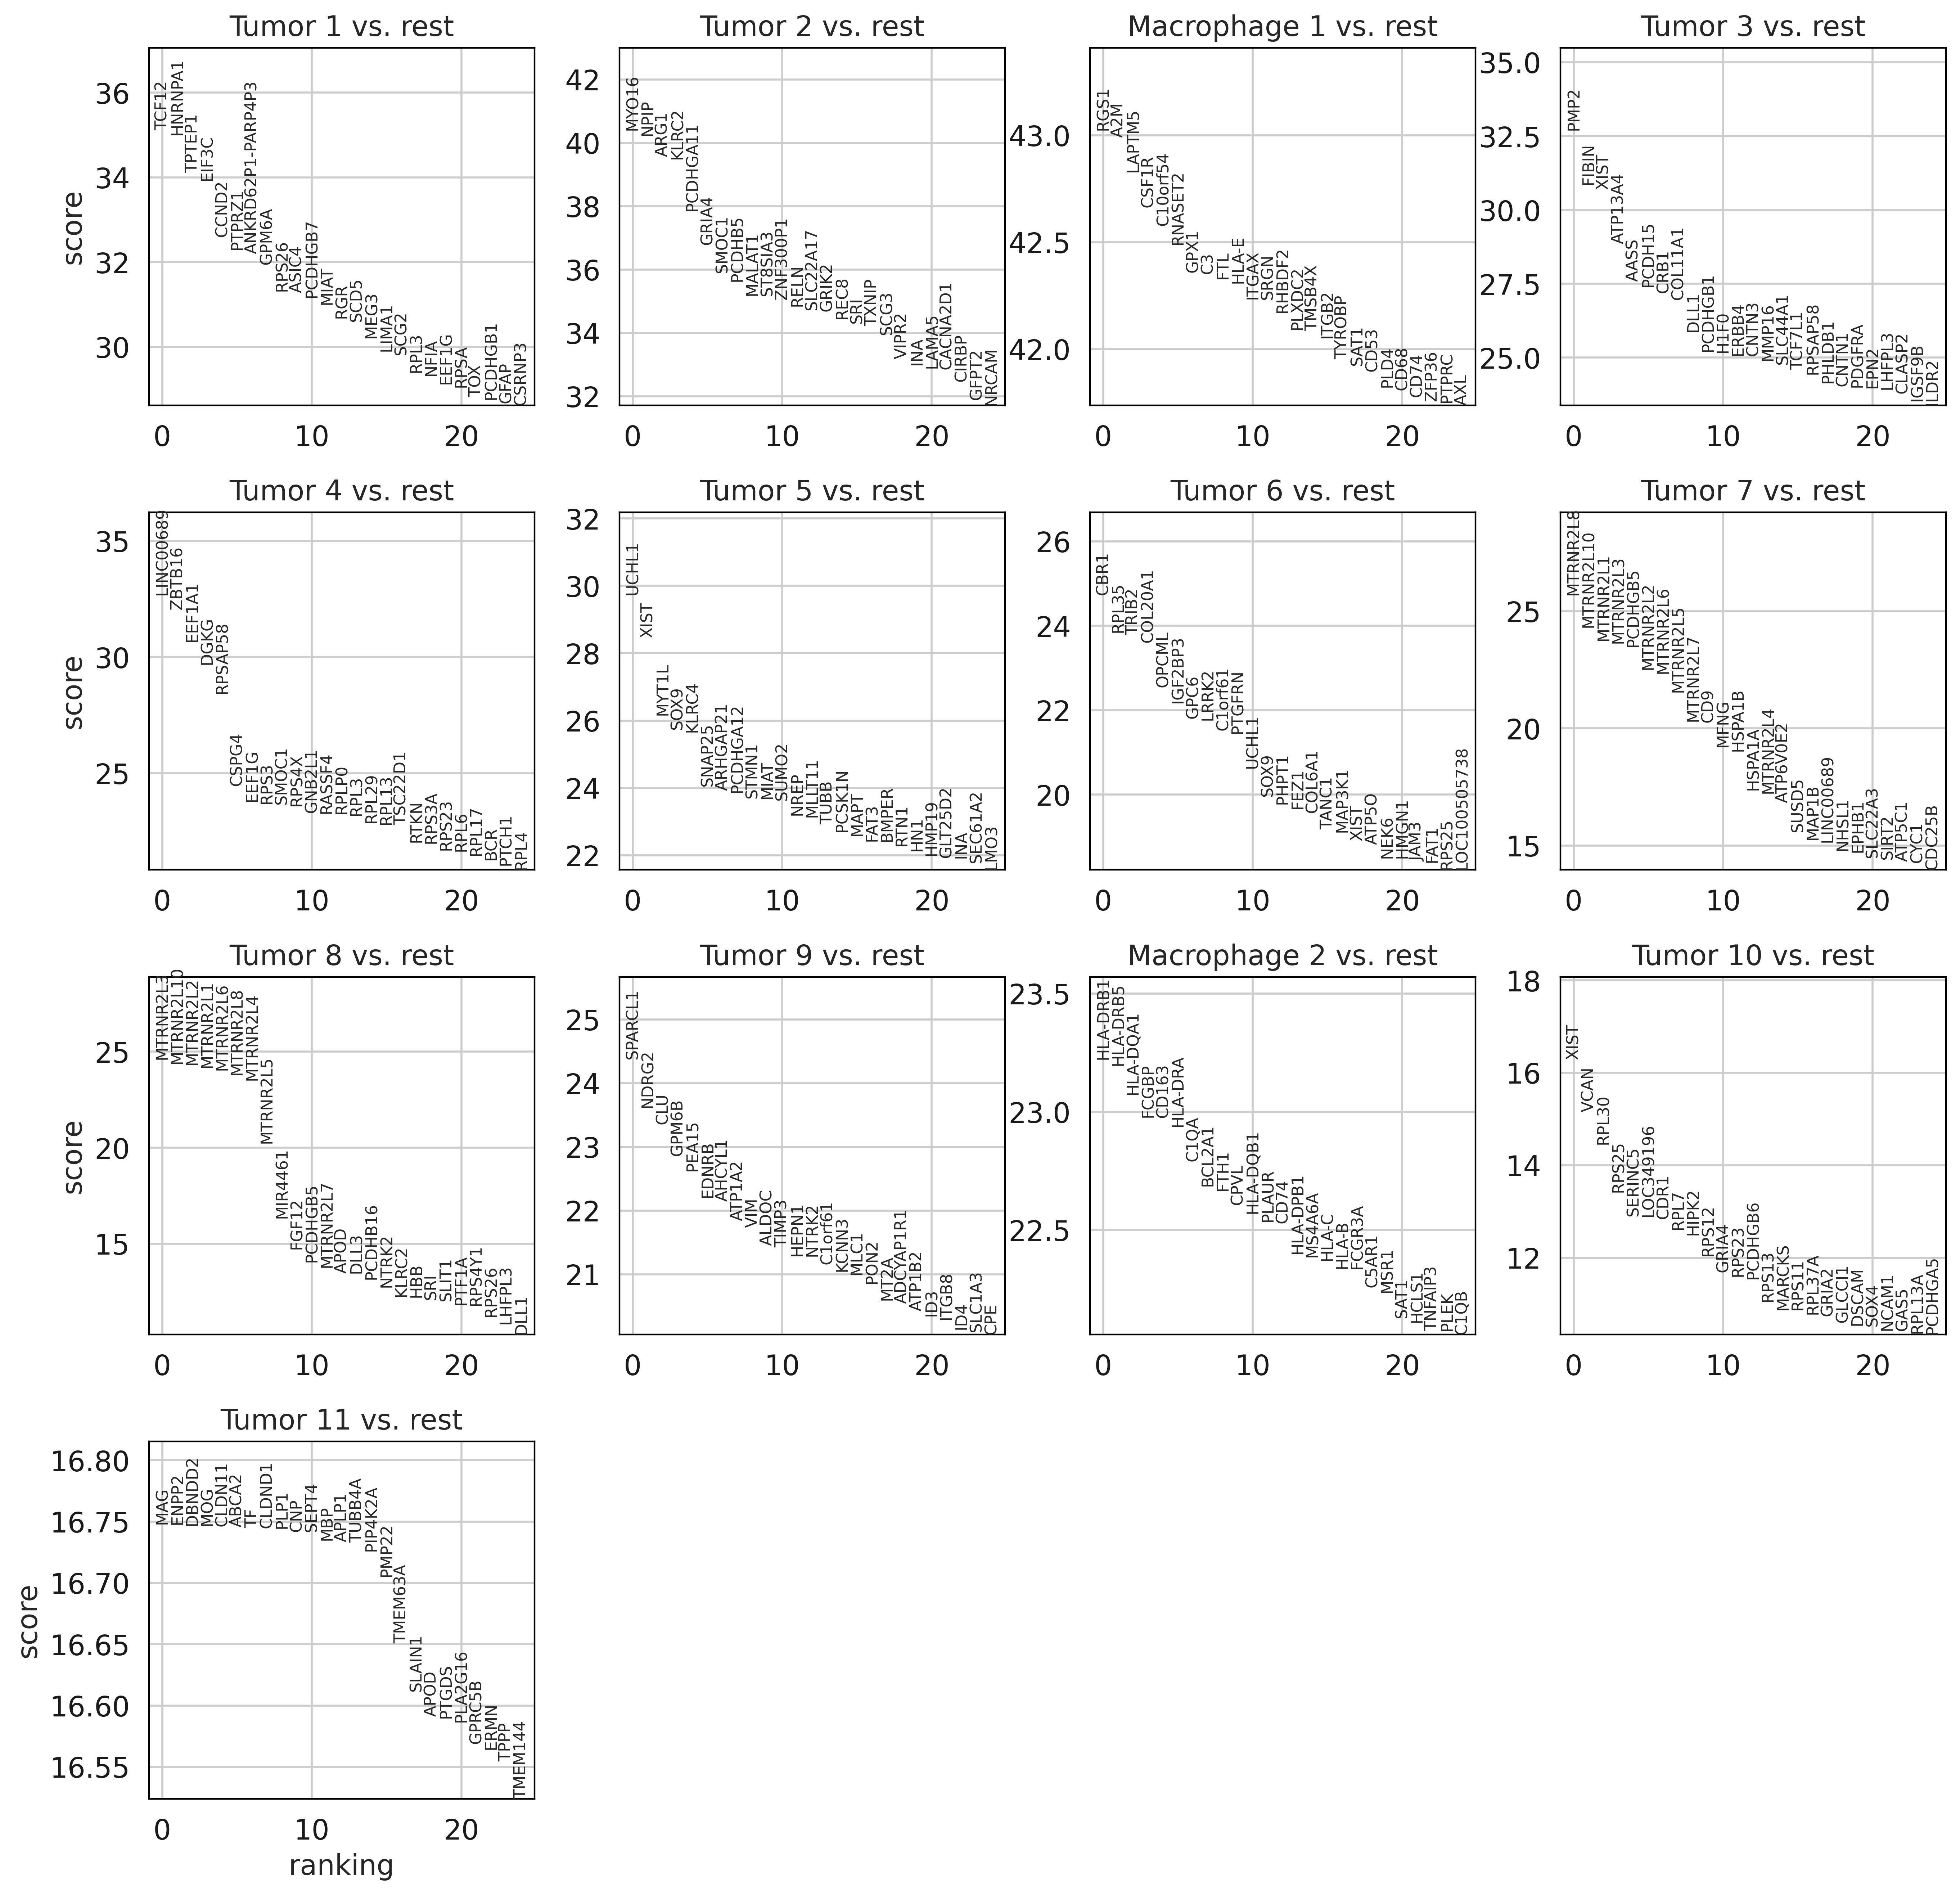

,Tumor 1,Tumor 2,Macrophage 1,Tumor 3,Tumor 4,Tumor 5,Tumor 6,Tumor 7,Tumor 8,Tumor 9,Macrophage 2,Tumor 10,Tumor 11
0,TCF12,MYO16,RGS1,PMP2,LINC00689,UCHL1,CBR1,MTRNR2L8,MTRNR2L3,SPARCL1,HLA-DRB1,XIST,MAG
1,HNRNPA1,NPIP,A2M,FIBIN,ZBTB16,XIST,RPL35,MTRNR2L10,MTRNR2L10,NDRG2,HLA-DRB5,VCAN,ENPP2
2,TPTEP1,ARG1,LAPTM5,XIST,EEF1A1,MYT1L,TRIB2,MTRNR2L1,MTRNR2L2,CLU,HLA-DQA1,RPL30,DBNDD2
3,EIF3C,KLRC2,CSF1R,ATP13A4,DGKG,SOX9,COL20A1,MTRNR2L3,MTRNR2L1,GPM6B,FCGBP,RPS25,MOG
4,CCND2,PCDHGA11,C10orf54,AASS,RPSAP58,KLRC4,OPCML,PCDHGB5,MTRNR2L6,PEA15,CD163,SERINC5,CLDN11
5,PTPRZ1,GRIA4,RNASET2,PCDH15,CSPG4,SNAP25,IGF2BP3,MTRNR2L2,MTRNR2L8,EDNRB,HLA-DRA,LOC349196,ABCA2
6,ANKRD62P1-PARP4P3,SMOC1,GPX1,CRB1,EEF1G,ARHGAP21,GPC6,MTRNR2L6,MTRNR2L4,AHCYL1,C1QA,CDR1,TF
7,GPM6A,PCDHB5,C3,COL11A1,RPS3,PCDHGA12,LRRK2,MTRNR2L5,MTRNR2L5,ATP1A2,BCL2A1,RPL7,CLDND1
8,RPS26,MALAT1,FTL,DLL1,SMOC1,STMN1,C1orf61,MTRNR2L7,MIR4461,VIM,FTH1,HIPK2,PLP1
9,ASIC4,ST8SIA3,HLA-E,PCDHGB1,RPS4X,MIAT,PTGFRN,CD9,FGF12,ALDOC,CPVL,RPS12,CNP


In [208]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method='wilcoxon', n_genes=adata.shape[1])
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

In [230]:
diff_expr_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(100)
tumor_diff_expr_genes_df = diff_expr_genes_df[orders[2:]]

In [240]:
tumor_common_degs = []
level = 0
while len(tumor_common_degs) <= 100:
    tumor_common_degs.extend(np.unique(tumor_diff_expr_genes_df.loc[level]))
    level += 1
    
tumor_common_degs = tumor_common_degs[:100]

In [251]:
final_degs_df = pd.DataFrame({'Tumor': tumor_common_degs})
final_degs_df = pd.concat([final_degs_df, diff_expr_genes_df[orders[:2]]], axis=1, sort=False)
final_degs_df.head()

,Tumor,Macrophage 1,Macrophage 2
0,CBR1,RGS1,HLA-DRB1
1,LINC00689,A2M,HLA-DRB5
2,MAG,LAPTM5,HLA-DQA1
3,MTRNR2L3,CSF1R,FCGBP
4,MTRNR2L8,C10orf54,CD163


Save the top 100 DEGs as "marker genes" (genes of interest) to file

In [252]:
final_degs_df.to_csv(data_path + 'cluster_marker_genes.csv', index=False,header=True)

Save the preprocessed matrix with cluster ID

In [253]:
filtered_counts.to_csv(data_path + 'preprocessed_counts.csv', index=True, header=True)

### Analysis & Comparison

We observed many differences between NicheNet's top L-R interactions between tumor cluster and two macrophage clusters with and without our proposed weight updating methods. 

Continued...

In [2]:
%%bash
ls -al top_rl_pairs/

total 24
drwxrwxr-x  2 yinuo yinuo 4096 Nov 25 22:04 .
drwxrwxr-x 11 yinuo yinuo 4096 Dec  7 22:33 ..
-rw-rw-r--  1 yinuo yinuo 1920 Nov 25 22:04 Macrophage.1_Tumor.csv
-rw-rw-r--  1 yinuo yinuo 1916 Nov 25 22:04 Macrophage.2_Tumor.csv
-rw-rw-r--  1 yinuo yinuo 1966 Nov 25 22:04 Tumor_Macrophage.1.csv
-rw-rw-r--  1 yinuo yinuo 1969 Nov 25 22:04 Tumor_Macrophage.2.csv


In [8]:
top_rl_pairs_orin = pd.read_csv('top_rl_pairs/Macrophage.1_Tumor.csv')
top_rl_pairs_orin.head()

,Ligand,Receptor,Score
1,IL6,IL6R,1.069278
2,SEMA4D,PLXNB1,0.905012
3,BMP7,BMPR2,0.891739
4,SEMA5A,PLXNB3,0.873316
5,IGF1,IGF1R,0.831916


In [9]:
top_rl_pairs_weighted = pd.read_csv('top_rl_pairs_weighted/Macrophage.1_Tumor.csv')
top_rl_pairs_weighted.head()

,Ligand,Receptor,Score
1,SPP1,CALM1,5.415055
2,CALR,RPSA,4.835649
3,IL1B,CALM1,4.249261
4,SPP1,EGFR,4.063868
5,CALR,ATP5B,3.622322


Extract unique L-R pairs in each list

In [30]:
tmp = set()
common_rl_pairs = set()
for i in range(len(top_rl_pairs_orin)):
    pair = (top_rl_pairs_orin.iloc[i]['Ligand'], top_rl_pairs_orin.iloc[i]['Receptor'])
    tmp.add(pair)
    
for i in range(len(top_rl_pairs_weighted)):
    pair = (top_rl_pairs_weighted.iloc[i]['Ligand'], top_rl_pairs_weighted.iloc[i]['Receptor'])
    if pair in tmp:
        common_rl_pairs.add(pair)
        
del tmp

In [35]:
unique_orig_pairs = []
for i in range(len(top_rl_pairs_orin)):
    pair = (top_rl_pairs_orin.iloc[i][0], top_rl_pairs_orin.iloc[i][1])
    if pair not in common_rl_pairs:
        unique_orig_pairs.append(pair)

In [36]:
unique_weighted_pairs = []
for i in range(len(top_rl_pairs_weighted)):
    pair = (top_rl_pairs_weighted.iloc[i][0], top_rl_pairs_weighted.iloc[i][1])
    if pair not in common_rl_pairs:
        unique_weighted_pairs.append(pair)